In [2]:
# Task1
import pandas as pd

# Q1
df = pd.read_csv('data.csv',encoding='utf-8')

# Q2
print(df.head(10))

# Q3
print(df.info())

# Q4
df = df.dropna()

# Q5
df = df.reset_index(drop=True)#drop=True表示删除旧的索引而不是将其添加为新的列

# Q6
df = df.drop('id', axis=1)

# Q7
print(df['diagnosis'].value_counts())

# Q8
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)#.apply()方法将函数应用于指定位置的每个元素

# Q9
print(df[df.columns[2:7]].describe())

# Q10
print(df.groupby('diagnosis').std() / df.groupby('diagnosis').mean())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

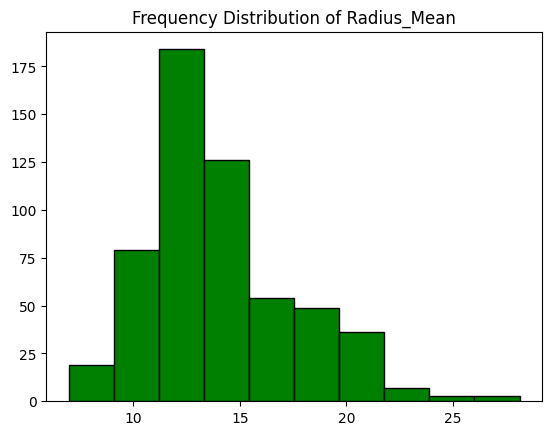

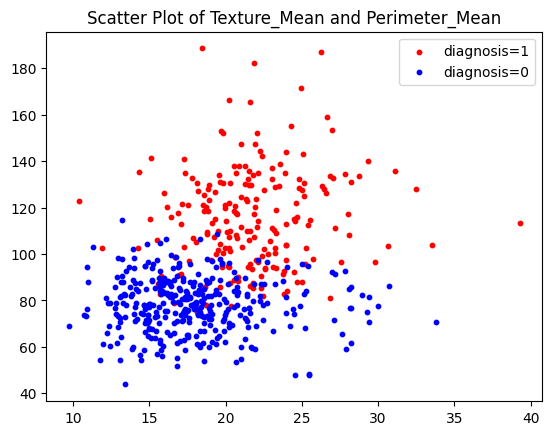

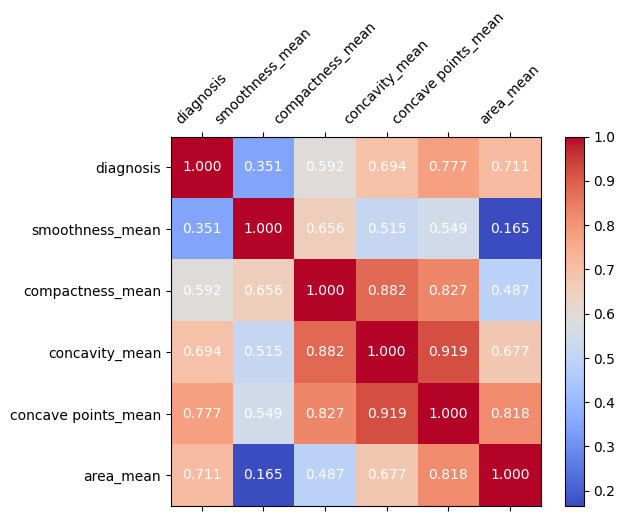

In [3]:
# Task2
import numpy as np
import matplotlib.pyplot as plt

# Q1
plt.hist(df['radius_mean'], bins=10, color='green', edgecolor='black')
plt.title('Frequency Distribution of Radius_Mean')
plt.show()

# Q2
plt.scatter(df[df['diagnosis'] == 1]['texture_mean'], df[df['diagnosis'] == 1]['perimeter_mean'], color='red', s=10, label='diagnosis=1')#s为散点大小
plt.scatter(df[df['diagnosis'] == 0]['texture_mean'], df[df['diagnosis'] == 0]['perimeter_mean'], color='blue', s=10, label='diagnosis=0')
plt.title('Scatter Plot of Texture_Mean and Perimeter_Mean')
plt.legend()
plt.show()

# Q3
selected_features = ['diagnosis', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'area_mean']
corr = df[selected_features].corr()
fig, ax = plt.subplots()#创建一个新的图形窗口和一个新的子图，plt.subplots()函数返回的第一个元素是一个Figure对象，第二个元素是一个或多个Axes对象
cax = ax.matshow(corr, cmap='coolwarm')#子图上绘制了一个热力图
fig.colorbar(cax)

# Add values to each cell
for i in range(len(selected_features)):
    for j in range(len(selected_features)):
        ax.text(j, i, format(corr.iloc[i, j], '.3f'), ha='center', va='center', color='white')
plt.xticks(np.arange(len(selected_features)), selected_features, rotation=45)
plt.yticks(np.arange(len(selected_features)), selected_features)
plt.show()

Q1 Model parameters:  [ 3.14186228 -0.44260792 -4.70867951]
Q2 Model parameters:  [ 3.14186228 -0.44260792 -4.70867951]
omega - coeffs =  [ 2.90434343e-13 -9.44599954e-12  5.34612354e-11]


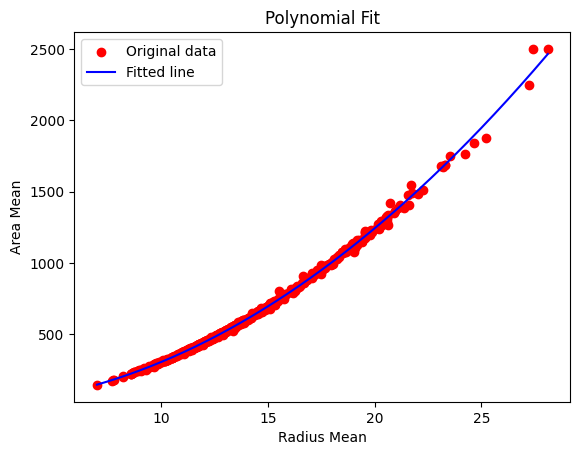

In [4]:
# Task3
# Q1
x = df['radius_mean'].values
y = df['area_mean'].values

X = np.column_stack((np.ones(len(x)), x, x**2))#np.column_stack()将三个一维数组堆叠成一个二维数组，每个一维数组成为新二维数组的一列
omega = np.linalg.inv(X.T @ X) @ X.T @ y
omega = np.flip(omega)
print("Q1 Model parameters: ", omega)

# Q2
coeffs = np.polyfit(df['radius_mean'], df['area_mean'], 2)
print("Q2 Model parameters: ", coeffs)
print("omega - coeffs = ", omega - coeffs)

# Q3
plt.scatter(df['radius_mean'], df['area_mean'], color='red', label='Original data')
x_line = np.linspace(min(df['radius_mean']), max(df['radius_mean']), 1000)
y_line = coeffs[0]*x_line**2 + coeffs[1]*x_line + coeffs[2]
plt.plot(x_line, y_line, color='blue', label='Fitted line')
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Polynomial Fit')
plt.legend()
plt.show()

# Q4
# 通过散点图看到radius_mean和area_mean明显是非线性关系
# 同时由于在数学上圆面积和直径的平方成正比，所以更加印证了上述结论
# 因此我们应该用一个二次多项式来拟合

Eigenvalues:  [5.90457503e+02 5.21373729e-02]
Eigenvectors: 
 [[ 0.98966947 -0.14336785]
 [ 0.14336785  0.98966947]]
Orthogonality check:  True


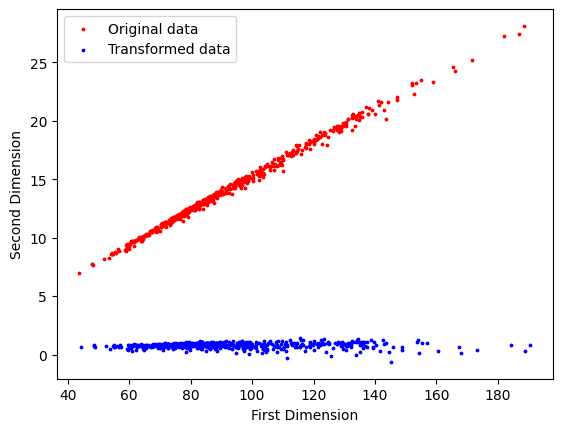

Covariance of Z: 
 [[ 5.90457503e+02 -2.90064136e-14]
 [-2.90064136e-14  5.21373729e-02]]
Z_reduced :  [[124.11059852]
 [134.47614923]
 [131.47994405]
 [ 78.41581832]
 [136.61327906]
 [ 83.50193786]
 [120.98093186]
 [ 91.23375941]
 [ 88.45986066]
 [ 84.8889088 ]
 [103.93580752]
 [133.78059949]
 [104.90110445]
 [ 94.60150296]
 [ 97.81529636]
 [ 95.86592562]
 [109.29579312]
 [ 88.49769253]
 [ 86.62064819]
 [ 61.07922386]
 [103.64038348]
 [138.81631498]
 [111.25071639]
 [117.25898346]
 [123.50671796]
 [103.53568182]
 [116.33096216]
 [126.18169289]
 [ 78.82241713]
 [114.07483701]
 [129.34142367]
 [108.2071567 ]
 [111.36258644]
 [ 94.70574433]
 [ 83.624678  ]
 [ 96.70210523]
 [ 89.41937976]
 [ 87.21657882]
 [ 72.72711284]
 [129.70861789]
 [ 88.32186316]
 [ 86.4257207 ]
 [ 52.35085119]
 [ 86.97993561]
 [ 78.96138802]
 [ 87.94620593]
 [ 75.63410871]
 [ 88.26461195]
 [ 76.6396877 ]
 [121.66939946]
 [ 98.42010718]
 [ 74.23395656]
 [126.95761487]
 [ 96.67185892]
 [ 83.62754535]
 [ 55.01418313]
 

In [5]:
# Task4
# Q1
X = df[["perimeter_mean", "radius_mean"]].to_numpy()
corX = np.cov(X.T)
eigValues, eigVectors = np.linalg.eig(corX)
print("Eigenvalues: ", eigValues)
print("Eigenvectors: \n", eigVectors)

# 验证矩阵eigVectors与其转置的乘积是否接近单位矩阵
print("Orthogonality check: ", np.allclose(eigVectors @ eigVectors.T, np.eye(2)))

# Q2
Z= X @ eigVectors
plt.scatter(X[:, 0], X[:, 1], color='red', s=3, label='Original data')
plt.scatter(Z[:, 0], Z[:, 1], color='blue', s=3, label='Transformed data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.legend()
plt.show()

# Q3
corZ = np.cov(Z.T)
print("Covariance of Z: \n", corZ)
Z_reduced = Z[:, :1]
print("Z_reduced : ", Z_reduced)

In [9]:
# Task5
from scipy import stats
# Q1
# 本情景应该进行成组检验，因为两组数据相互独立

# Q2
group1 = df[df['diagnosis'] == 0]['concavity_worst']
group2 = df[df['diagnosis'] == 1]['concavity_worst']
mean1 = group1.mean()
mean2 = group2.mean()
print("Mean of group1: ", mean1)
print("Mean of group2: ", mean2)
# 单侧检验原假设：Mean of group1 == Mean of group2

# Q3
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
p_value_one_tailed = p_value / 2
print("t-statistic: ", t_stat)
print("p-value for one-tailed test: ", p_value_one_tailed)

# Q4
# 因为p值为1.4640846763013579e-69远小于0.05，因此很有把握否认原假设，接受备择假设，即Mean of group1 <= Mean of group2

Mean of group1:  0.1663615971830986
Mean of group2:  0.44671356097560977
t-statistic:  -19.01722049062515
p-value for one-tailed test:  5.469799049160595e-56
